In [535]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [536]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: "setosa", 1: "versicolor", 2: "virginica"})
# Shuffle the data
iris_df = iris_df.sample(frac=1, random_state=42)

Text(0.5, 1.0, 'Correlation Matrix of Iris Features')

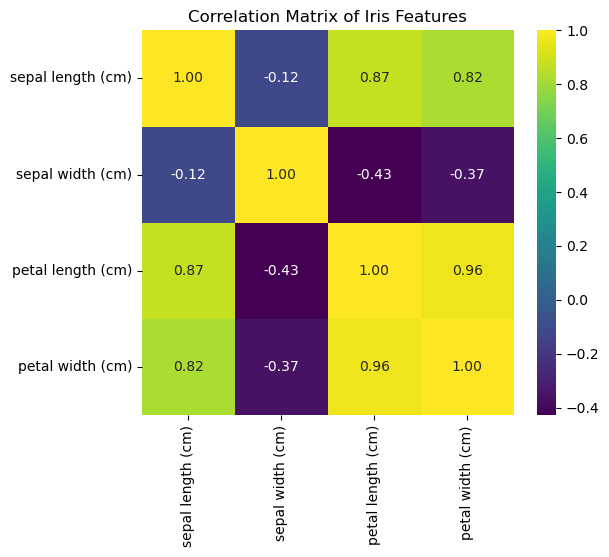

In [537]:
# Set width to 6 and height to 5
plt.figure(figsize=(6, 5))

# Drop categorical column 'species'
numeric_df = iris_df.drop(columns=['species'])

# Calculate correlations between numeric data in iris_df
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, cmap = "viridis", annot = True, fmt = ".2f")

# Add a title
plt.title('Correlation Matrix of Iris Features')

Text(0.5, 1.05, 'Pairplot of Iris Data Features')

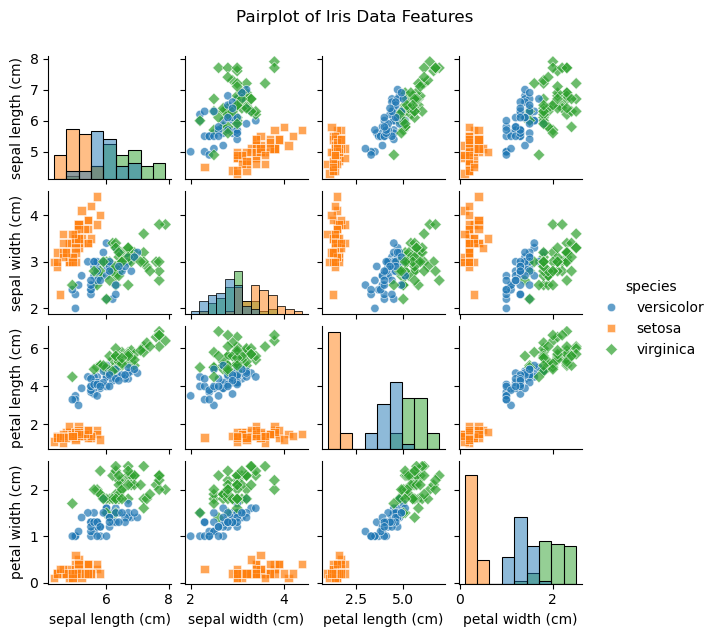

In [538]:
# Plot pairplot of iris_df as scatter plots and histograms by species
sns.pairplot(iris_df, diag_kind = "hist", plot_kws = {'alpha': 0.7}, hue="species", height = 1.5, markers=["o", "s", "D"])
# Add title
plt.suptitle("Pairplot of Iris Data Features", y=1.05)

Text(0.5, 1.0, 'Distance Matrix Between Datapoint Pairs')

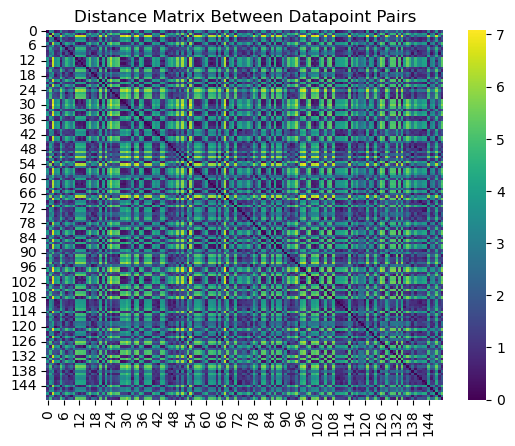

In [539]:
from scipy.spatial.distance import pdist, squareform

# Calculate pairwise distances using the euclidean distance metric
distance_matrix = pdist(numeric_df, metric='euclidean')

# Convert distance matrix into a full squareform distance matrix
square_distance_matrix = squareform(distance_matrix)

# Plot a heatmap using square-form distance matrix
sns.heatmap(square_distance_matrix, cmap='viridis', annot=False, fmt='.2f', cbar=True)

# Add title
plt.title('Distance Matrix Between Datapoint Pairs')

c:\Users\AUC\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\AUC\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\AUC\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\AUC\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 1.0, 'Cluster Map Of Distance Matrix')

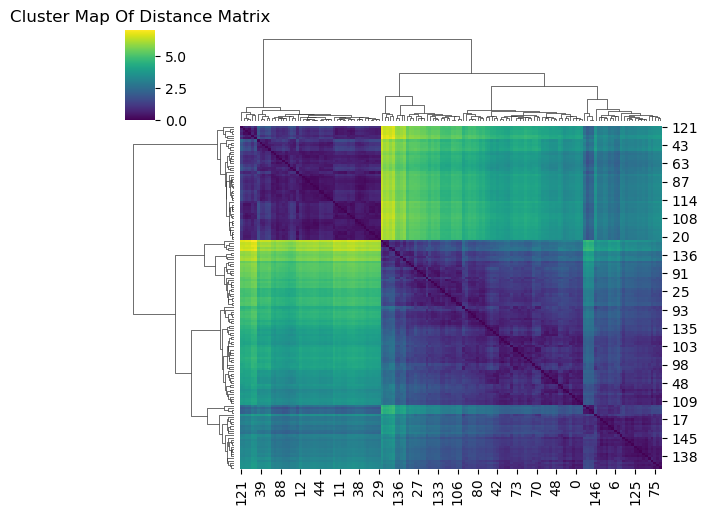

In [540]:
# Plot cluster map of square-form distance matrix using median method and euclidean ditance metric
sns.clustermap(square_distance_matrix, cmap= "viridis", method = "median", metric = "euclidean", figsize=(6,5))

plt.title('Cluster Map Of Distance Matrix')

c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


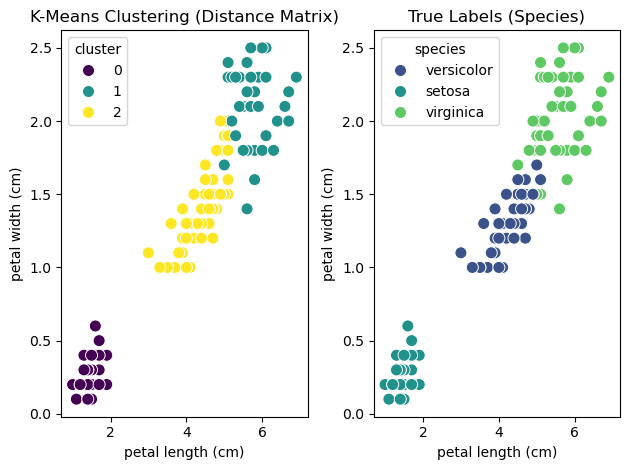

In [541]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with 3 clusters, random initialization, and a fixed random state
kmeans = KMeans(n_clusters = 3, init= 'random', random_state=42)

# Fit the model to the square distance matrix and predict cluster labels
cluster_labels = kmeans.fit_predict(square_distance_matrix)

# Add predicted labels as a new column 'cluster' in iris_df
iris_df['cluster'] = cluster_labels

# Plot 1: Plot the K-Means cluster predictions by cluster
plt.subplot(1, 2, 1)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster', data=iris_df, palette='viridis', s=75)
plt.title('K-Means Clustering (Distance Matrix)')

# Plot 2: Plot the data by the true label: species
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=iris_df, palette='viridis', s=75)
plt.title('True Labels (Species)')


plt.tight_layout()


Yes, the K-means clusters and the true labels coincide. This means that the clustering succeeded in matching the actual classification of the different types of iris flowers.

### Chosen Indicators
- Unemployment, total (% of total labor force) (modeled ILO estimate)
- School enrollment, primary (% gross)
- Government expenditure per student, primary (% of GDP per capita)

In [542]:
# Load the 'unemployment data.csv' file into a data frame
unemployment_df = pd.read_csv('unemployment data.csv', header = 4)

# Select Italy and UK as countries 
countries = ["Italy", "United Kingdom"]

# Filter dataframe to include the rows of the selected country names only
country_unemp_data = unemployment_df[unemployment_df["Country Name"].isin(countries)]

# Select a range of years from 2000 to 2010
start_year = 2000
end_year = 2010

# Create a list of column names corresponding to years falling in chosen range
year_columns = [str(year) for year in range(start_year, end_year + 1)]

# Drop missing values in the selected year range if there are any
unemp_data = country_unemp_data[["Country Name"] + year_columns].dropna()

In [543]:
# Load the 'government expenditure data.csv' file into a data frame
expenditure_df = pd.read_csv('government expenditure data.csv', header = 4)

# Filter dataframe to include the rows of the selected country names only
country_exp_data = expenditure_df[expenditure_df["Country Name"].isin(countries)]

# Drop missing values in the selected year range if any
exp_data = country_exp_data[["Country Name"] + year_columns].dropna()

In [544]:
# Load the 'school enrollment data.csv' file into a data frame
enrolment_df = pd.read_csv('school enrollment data.csv', header = 4)

# Filter dataframe to include the rows of the selected country names
country_enrol_data = enrolment_df[enrolment_df["Country Name"].isin(countries)]

# Drop missing values in the selected year range if any
enrol_data = country_enrol_data[["Country Name"] + year_columns].dropna()

In [545]:
# Melt the dataframes to long format for easier merging
exp_data_long = exp_data.melt(id_vars=["Country Name"], var_name="Year", value_name="Expenditure")
enrol_data_long = enrol_data.melt(id_vars=["Country Name"], var_name="Year", value_name="Enrollment")
unemp_data_long = unemp_data.melt(id_vars=["Country Name"], var_name="Year", value_name="Unemployment")

# Merge expenditure, enrollment, and unemployment data by Country Name and Year
combined_data = pd.merge(exp_data_long, enrol_data_long, on=["Country Name", "Year"])
combined_data = pd.merge(combined_data, unemp_data_long, on=["Country Name", "Year"])

print(combined_data.head())

     Country Name  Year  Expenditure  Enrollment  Unemployment
0  United Kingdom  2000     12.72822  100.591759         5.558
1           Italy  2000     22.28217  102.288490        10.834
2  United Kingdom  2001     13.26629  100.935944         4.696
3           Italy  2001     22.79092  101.998978         9.599
4  United Kingdom  2002     14.41264  100.692192         5.037


Text(0.5, 1.0, 'Correlation Matrix Between Expenditure, Enrollment, and Unemployment')

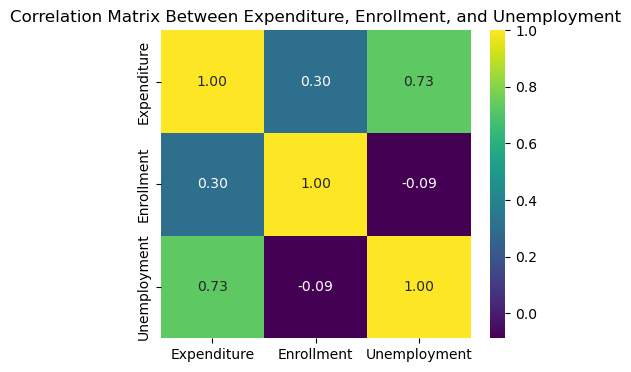

In [546]:
plt.figure(figsize=(5, 4))

# Drop categorical data columns from combined_data data frame
numeric_combined_data = combined_data.drop(columns=['Country Name', 'Year'])

# Calculate the correlations between the numeric data of each variable
corr_matrix = numeric_combined_data.corr()

# Plot a heat map of the correlation matrix
sns.heatmap(corr_matrix, cmap = "viridis", annot = True, fmt = ".2f")

plt.title('Correlation Matrix Between Expenditure, Enrollment, and Unemployment')

- Government expenditure per student in primary school (as a % of GDP per capita) and primary school enrollment (% gross), and the former and total unemployment (%) are positively correlated. There exists a stronger positive correlation between expenditure and unemployment. 
- However, the total unemployment and primary school enrollment are negatively correlated.

Text(0.5, 1.02, 'Pairplot of Expenditure, Enrollment, and Unemployment')

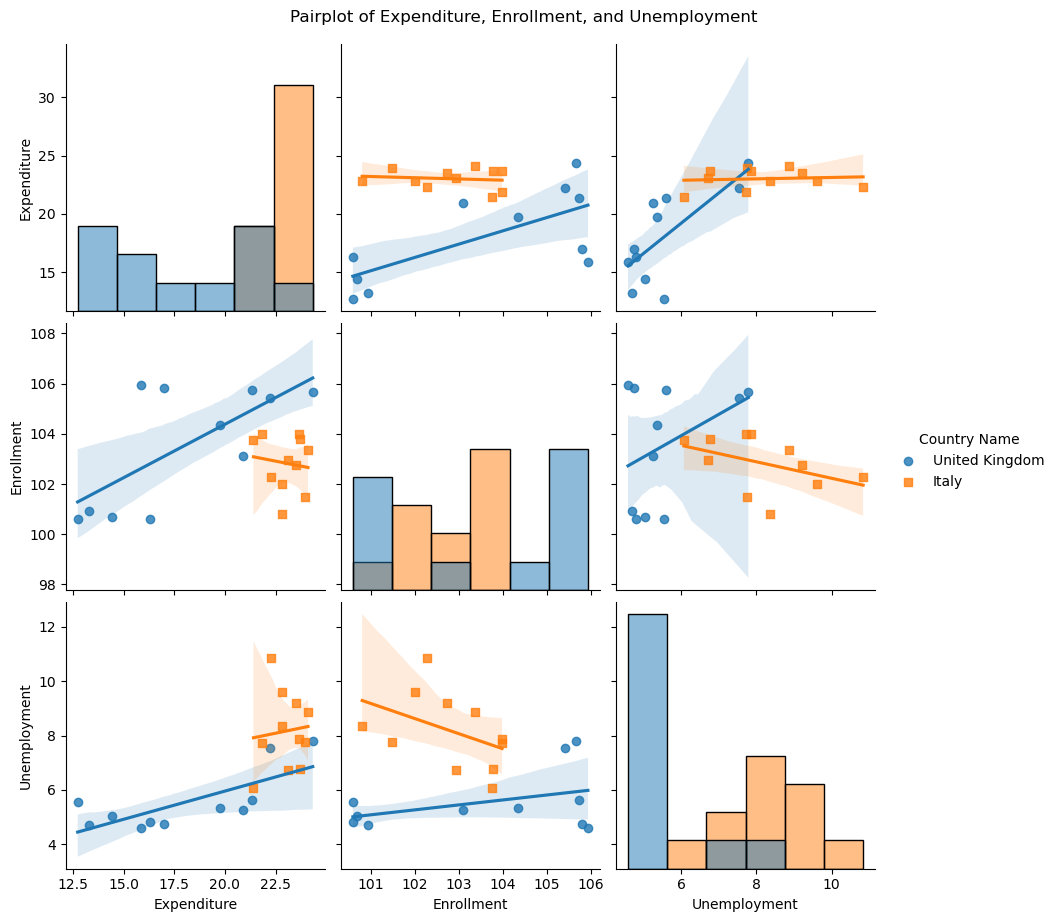

In [547]:
# Plot a pairplot of combined data using kde
# Plot a regression on each joint plot
p = sns.pairplot(combined_data, kind = "reg", hue="Country Name", diag_kind = "hist", height = 3, markers=["o", "s"])
plt.suptitle("Pairplot of Expenditure, Enrollment, and Unemployment", y=1.02)


- The marginal distribution of each variable varies bewtween the two countries. We can infer that over the chosen 10 years, expenditure in Italy has been greater than that in the UK while the opposite is true for unemployment. 
- I notice that the relationships between unemployment and government expenditure per primary school student and that between the latter and enrollment in Italy are extremely strong according to the regression performed on joint distribution scatter plots

Text(0.5, 1.0, 'Trends of Expenditure, Enrollment, and Unemployment by Country')

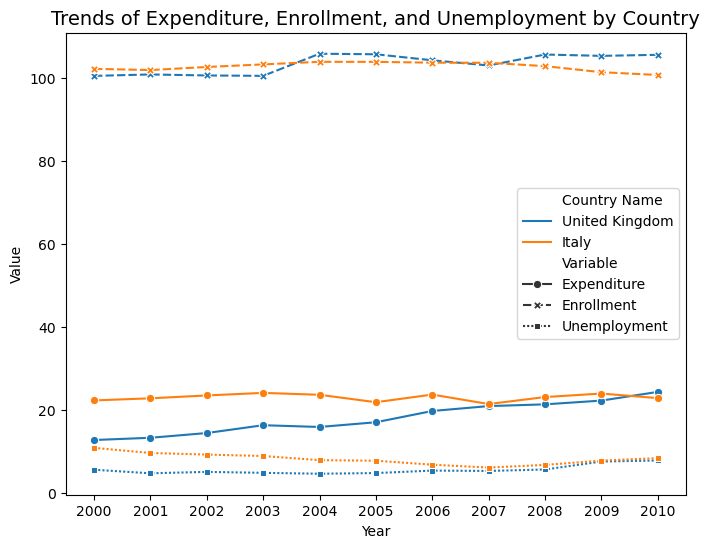

In [548]:
# Create a long format data frame
melted_data = combined_data.melt(id_vars=["Country Name", "Year"], var_name="Variable", value_name="Value")

# Plot a line plot by Country Name
plt.figure(figsize=(8, 6))
sns.lineplot(melted_data, x="Year", y="Value", hue="Country Name", style="Variable", markers=True)
plt.title("Trends of Expenditure, Enrollment, and Unemployment by Country", fontsize=14)


- This line plot makes clear an intuitive relationship between the variables across the 10 years. For instance, in the Uk, an increase in primary school enrollment follows an increase in government expenditure. 
- Overall, the variables have similar trends in both countries. 